## **N^2 - 1 Puzzle Problem**
Write a Python/ Java/ C/ C++ program to solve the (n^2 − 1)-puzzle problem using the following search algorithms:
- Breadth-First Search (BFS)
- Depth-First Search (DFS)
- Iterative Deepening (ID)

### 1. Breadth-First Search (BFS)


Testing for n=2

Trial 1/10 for 2x2 puzzle
Initial State:
1 2
3 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: 

Trial 2/10 for 2x2 puzzle
Initial State:
1 3
2 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 3/10 for 2x2 puzzle
Initial State:
0 3
2 1

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: R D L U R D

Trial 4/10 for 2x2 puzzle
Initial State:
3 0
2 1

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: D L U R D

Trial 5/10 for 2x2 puzzle
Initial State:
2 0
3 1

Goal State:
1 2
3 0
Timeout or no solution

Trial 6/10 for 2x2 puzzle
Initial State:
3 0
1 2

Goal State:
1 2
3 0
Timeout or no solution

Trial 7/10 for 2x2 puzzle
Initial State:
2 1
0 3

Goal State:
1 2
3 0
Timeout or no solution

Trial 8/10 for 2x2 puzzle
Initial State:
1 3
2 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 9/10 for 2x2 puzzle
Initial State:
2 0
3 1

Goal State:
1 2
3 0
Timeout or no solution

Trial 10/10 for 2x2 puzzle
Initial State:
0 1
2 3

Goal State:
1 2
3 0
Timeout or no solutio

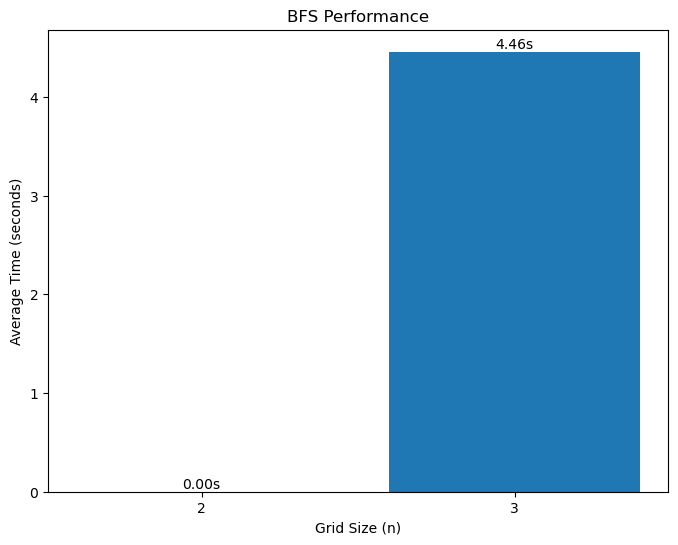

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import random

class PuzzleState:
    def __init__(self, state, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action
        self.size = len(state)
        
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
        
    def find_blank(self):
        return next((i, j) for i in range(self.size) 
                   for j in range(self.size) if self.state[i][j] == 0)

def generate_random_state(n):
    numbers = list(range(n*n))
    random.shuffle(numbers)
    return [numbers[i:i+n] for i in range(0, n*n, n)]

def get_successors(node):
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    successors = []
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < node.size and 0 <= new_j < node.size:
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleState(new_state, node, action))
    return successors

def get_inversions(state):
    # Flatten state and count inversions
    flat = []
    for i in range(len(state)):
        for j in range(len(state)):
            if state[i][j] != 0:
                flat.append(state[i][j])
    
    inversions = 0
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inversions += 1
    return inversions

def is_solvable(state):
    n = len(state)
    inversions = get_inversions(state)
    
    # Find blank position from bottom
    blank_row = 0
    for i in range(n-1, -1, -1):
        for j in range(n):
            if state[i][j] == 0:
                blank_row = n - i
                break
    
    # For odd grid size
    if n % 2 == 1:
        return inversions % 2 == 0
    # For even grid size
    else:
        if blank_row % 2 == 0:
            return inversions % 2 == 1
        else:
            return inversions % 2 == 0

def manhattan_distance(state, goal):
    n = len(state)
    distance = 0
    
    # Create goal position lookup
    goal_pos = {}
    for i in range(n):
        for j in range(n):
            goal_pos[goal[i][j]] = (i, j)
    
    # Calculate total manhattan distance
    for i in range(n):
        for j in range(n):
            if state[i][j] != 0:
                gi, gj = goal_pos[state[i][j]]
                distance += abs(i - gi) + abs(j - gj)
    return distance

def bfs_solve(initial_state, goal_state, timeout=60):
    if not is_solvable(initial_state):
        return None, 0
        
    start_time = time.time()
    initial = PuzzleState(initial_state)
    queue = deque([(manhattan_distance(initial_state, goal_state), initial)])
    visited = set()
    
    while queue and (time.time() - start_time) < timeout:
        _, current = queue.popleft()
        state_tuple = tuple(map(tuple, current.state))
        
        if current.state == goal_state:
            path = []
            while current.parent:
                path.append(current.action)
                current = current.parent
            return path[::-1], time.time() - start_time
            
        if state_tuple not in visited:
            visited.add(state_tuple)
            for successor in get_successors(current):
                if tuple(map(tuple, successor.state)) not in visited:
                    h = manhattan_distance(successor.state, goal_state)
                    queue.append((h, successor))
    
    return None, time.time() - start_time

def run_bfs_experiment(n):
    goal_state = [[i + 1 if i < n*n-1 else 0 for i in range(j*n, (j+1)*n)] 
                 for j in range(n)]
    
    results = []
    timeouts = 0
    initial_states = [generate_random_state(n) for _ in range(10)]
    
    for i, init_state in enumerate(initial_states, 1):
        print(f"\nTrial {i}/10 for {n}x{n} puzzle")
        print("Initial State:")
        print(PuzzleState(init_state))
        print("\nGoal State:")
        print(PuzzleState(goal_state))
        solution, solve_time = bfs_solve(init_state, goal_state)
        if solution is not None and solve_time < 60:
            results.append(solve_time)
            print(f"Solved in {solve_time:.2f} seconds")
            print("Moves:", ' '.join(solution))
        else:
            timeouts += 1
            print("Timeout or no solution")
    
    if results:
        avg_time = sum(results) / len(results)
        std_dev = np.std(results) if len(results) > 1 else 0
        print(f"\nResults for n={n}:")
        print(f"Average time: {avg_time:.2f} seconds")
        print(f"Standard deviation: {std_dev:.2f}")
        print(f"Successful solves: {len(results)}/10")
        return avg_time, std_dev, len(results)
    return None, None, 0

def main():
    n_values = [2, 3]
    times = []
    
    for n in n_values:
        print(f"\nTesting for n={n}")
        avg_time, std_dev, successes = run_bfs_experiment(n)
        if avg_time is not None:
            times.append(avg_time)
    
    plt.figure(figsize=(8, 6))
    plt.bar(n_values[:len(times)], times)
    
    # Labels and title
    plt.xlabel('Grid Size (n)')
    plt.ylabel('Average Time (seconds)')
    plt.title('BFS Performance')
    
    # Set x-ticks to be integers
    plt.xticks(n_values)
    
    # Add value labels on bars
    for i, v in enumerate(times):
        plt.text(n_values[i], v, f'{v:.2f}s', 
                ha='center', va='bottom')
    
    plt.savefig('bfs_results.png')
    plt.show()

if __name__ == "__main__":
    main()

### 2. Depth-First Search (DFS)


Testing for n=2

Trial 1/10 for 2x2 puzzle
Initial State:
3 2
1 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 2/10 for 2x2 puzzle
Initial State:
1 2
3 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: 

Trial 3/10 for 2x2 puzzle
Initial State:
3 0
1 2

Goal State:
1 2
3 0
Timeout or no solution

Trial 4/10 for 2x2 puzzle
Initial State:
0 2
1 3

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: R D L U R D L U R D

Trial 5/10 for 2x2 puzzle
Initial State:
1 2
0 3

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: R

Trial 6/10 for 2x2 puzzle
Initial State:
2 1
3 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 7/10 for 2x2 puzzle
Initial State:
1 2
3 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: 

Trial 8/10 for 2x2 puzzle
Initial State:
1 3
2 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 9/10 for 2x2 puzzle
Initial State:
0 2
3 1

Goal State:
1 2
3 0
Timeout or no solution

Trial 10/10 for 2x2 puzzle
Initial State:
3 1
2 0

Goal State:
1 2
3 0
Solved in 0.0

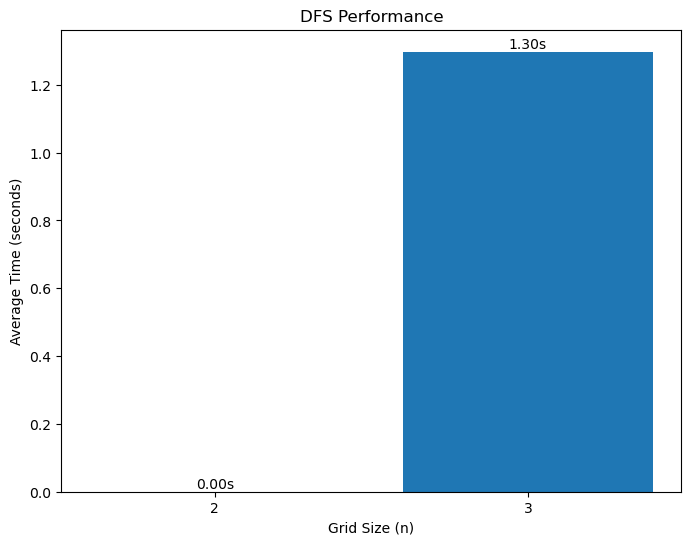

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import random

class PuzzleState:
    def __init__(self, state, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action
        self.size = len(state)
        
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
        
    def find_blank(self):
        return next((i, j) for i in range(self.size) 
                   for j in range(self.size) if self.state[i][j] == 0)

def generate_random_state(n):
    numbers = list(range(n*n))
    random.shuffle(numbers)
    return [numbers[i:i+n] for i in range(0, n*n, n)]

def get_successors(node):
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    successors = []
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < node.size and 0 <= new_j < node.size:
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleState(new_state, node, action))
    return successors

def get_inversions(state):
    # Flatten state and count inversions
    flat = []
    for i in range(len(state)):
        for j in range(len(state)):
            if state[i][j] != 0:
                flat.append(state[i][j])
    
    inversions = 0
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inversions += 1
    return inversions

def is_solvable(state):
    n = len(state)
    inversions = get_inversions(state)
    
    # Find blank position from bottom
    blank_row = 0
    for i in range(n-1, -1, -1):
        for j in range(n):
            if state[i][j] == 0:
                blank_row = n - i
                break
    
    # For odd grid size
    if n % 2 == 1:
        return inversions % 2 == 0
    # For even grid size
    else:
        if blank_row % 2 == 0:
            return inversions % 2 == 1
        else:
            return inversions % 2 == 0

def manhattan_distance(state, goal):
    n = len(state)
    distance = 0
    
    # Create goal position lookup
    goal_pos = {}
    for i in range(n):
        for j in range(n):
            goal_pos[goal[i][j]] = (i, j)
    
    # Calculate total manhattan distance
    for i in range(n):
        for j in range(n):
            if state[i][j] != 0:
                gi, gj = goal_pos[state[i][j]]
                distance += abs(i - gi) + abs(j - gj)
    return distance

def dfs_solve(initial_state, goal_state, timeout=60):
    if not is_solvable(initial_state):
        return None, 0
        
    start_time = time.time()
    initial = PuzzleState(initial_state)
    stack = [(manhattan_distance(initial_state, goal_state), initial)]  # Using list as stack
    visited = set()
    
    while stack and (time.time() - start_time) < timeout:
        _, current = stack.pop()  # Use pop() instead of popleft() for DFS
        state_tuple = tuple(map(tuple, current.state))
        
        if current.state == goal_state:
            path = []
            while current.parent:
                path.append(current.action)
                current = current.parent
            return path[::-1], time.time() - start_time
            
        if state_tuple not in visited:
            visited.add(state_tuple)
            # Add successors to stack (reverse order to maintain same move priority)
            for successor in reversed(get_successors(current)):
                if tuple(map(tuple, successor.state)) not in visited:
                    h = manhattan_distance(successor.state, goal_state)
                    stack.append((h, successor))
    
    return None, time.time() - start_time

def run_dfs_experiment(n):
    goal_state = [[i + 1 if i < n*n-1 else 0 for i in range(j*n, (j+1)*n)] 
                 for j in range(n)]
    
    results = []
    timeouts = 0
    initial_states = [generate_random_state(n) for _ in range(10)]
    
    for i, init_state in enumerate(initial_states, 1):
        print(f"\nTrial {i}/10 for {n}x{n} puzzle")
        print("Initial State:")
        print(PuzzleState(init_state))
        print("\nGoal State:")
        print(PuzzleState(goal_state))
        solution, solve_time = dfs_solve(init_state, goal_state)
        if solution is not None and solve_time < 60:
            results.append(solve_time)
            print(f"Solved in {solve_time:.2f} seconds")
            print("Moves:", ' '.join(solution))
        else:
            timeouts += 1
            print("Timeout or no solution")
    
    if results:
        avg_time = sum(results) / len(results)
        std_dev = np.std(results) if len(results) > 1 else 0
        print(f"\nResults for n={n}:")
        print(f"Average time: {avg_time:.2f} seconds")
        print(f"Standard deviation: {std_dev:.2f}")
        print(f"Successful solves: {len(results)}/10")
        return avg_time, std_dev, len(results)
    return None, None, 0

def main():
    n_values = [2, 3]
    times = []
    
    for n in n_values:
        print(f"\nTesting for n={n}")
        avg_time, std_dev, successes = run_dfs_experiment(n)
        if avg_time is not None:
            times.append(avg_time)
    
    plt.figure(figsize=(8, 6))
    plt.bar(n_values[:len(times)], times)
    plt.xlabel('Grid Size (n)')
    plt.ylabel('Average Time (seconds)')
    plt.title('DFS Performance')
    plt.xticks(n_values)
    
    for i, v in enumerate(times):
        plt.text(n_values[i], v, f'{v:.2f}s', 
                ha='center', va='bottom')
    
    plt.savefig('dfs_results.png')
    plt.show()

if __name__ == "__main__":
    main()

### 3. Iterative Deepening (ID)


Testing for n=2

Trial 1/10 for 2x2 puzzle
Initial State:
2 3
0 1

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: R U L D R

Trial 2/10 for 2x2 puzzle
Initial State:
2 0
1 3

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: L D R

Trial 3/10 for 2x2 puzzle
Initial State:
1 3
0 2

Goal State:
1 2
3 0
Timeout or no solution

Trial 4/10 for 2x2 puzzle
Initial State:
2 1
3 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 5/10 for 2x2 puzzle
Initial State:
0 1
2 3

Goal State:
1 2
3 0
Timeout or no solution

Trial 6/10 for 2x2 puzzle
Initial State:
2 1
3 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 7/10 for 2x2 puzzle
Initial State:
3 1
2 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: L U R D

Trial 8/10 for 2x2 puzzle
Initial State:
1 2
3 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: 

Trial 9/10 for 2x2 puzzle
Initial State:
2 3
1 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: U L D R

Trial 10/10 for 2x2 puzzle
Initial State:
3 2
0 1

Goal State:
1 2
3

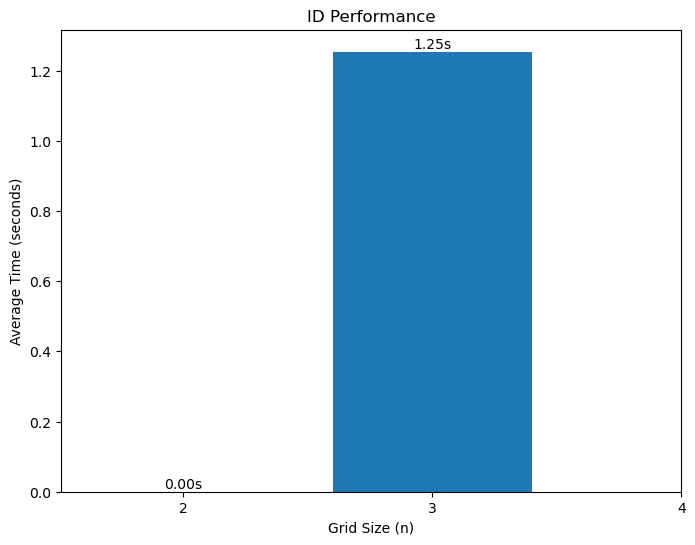

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import random

class PuzzleState:
    def __init__(self, state, parent=None, action=None, depth=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.depth = depth
        self.size = len(state)
        
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
        
    def find_blank(self):
        return next((i, j) for i in range(self.size) 
                   for j in range(self.size) if self.state[i][j] == 0)

def generate_random_state(n):
    numbers = list(range(n*n))
    random.shuffle(numbers)
    return [numbers[i:i+n] for i in range(0, n*n, n)]

def get_successors(node):
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    successors = []
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < node.size and 0 <= new_j < node.size:
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleState(new_state, node, action, node.depth + 1))
    return successors

def get_inversions(state):
    flat = []
    for i in range(len(state)):
        for j in range(len(state)):
            if state[i][j] != 0:
                flat.append(state[i][j])
    
    inversions = 0
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inversions += 1
    return inversions

def is_solvable(state):
    n = len(state)
    inversions = get_inversions(state)
    
    blank_row = 0
    for i in range(n-1, -1, -1):
        for j in range(n):
            if state[i][j] == 0:
                blank_row = n - i
                break
    
    if n % 2 == 1:
        return inversions % 2 == 0
    else:
        if blank_row % 2 == 0:
            return inversions % 2 == 1
        else:
            return inversions % 2 == 0

def manhattan_distance(state, goal):
    n = len(state)
    distance = 0
    goal_pos = {}
    for i in range(n):
        for j in range(n):
            goal_pos[goal[i][j]] = (i, j)
    
    for i in range(n):
        for j in range(n):
            if state[i][j] != 0:
                gi, gj = goal_pos[state[i][j]]
                distance += abs(i - gi) + abs(j - gj)
    return distance

def depth_limited_search(node, goal_state, depth_limit, visited):
    if node.state == goal_state:
        path = []
        current = node
        while current.parent:
            path.append(current.action)
            current = current.parent
        return path[::-1]
    
    if node.depth >= depth_limit:
        return None
        
    state_tuple = tuple(map(tuple, node.state))
    if state_tuple in visited:
        return None
    visited.add(state_tuple)
    
    for successor in get_successors(node):
        if tuple(map(tuple, successor.state)) not in visited:
            result = depth_limited_search(successor, goal_state, depth_limit, visited)
            if result is not None:
                return result
    return None

def id_solve(initial_state, goal_state, timeout=60):
    if not is_solvable(initial_state):
        return None, 0
        
    start_time = time.time()
    depth = 0
    
    while (time.time() - start_time) < timeout:
        visited = set()
        initial = PuzzleState(initial_state, depth=0)
        result = depth_limited_search(initial, goal_state, depth, visited)
        if result is not None:
            return result, time.time() - start_time
        depth += 1
    
    return None, time.time() - start_time

def run_id_experiment(n):
    goal_state = [[i + 1 if i < n*n-1 else 0 for i in range(j*n, (j+1)*n)] 
                 for j in range(n)]
    
    results = []
    timeouts = 0
    initial_states = [generate_random_state(n) for _ in range(10)]
    
    for i, init_state in enumerate(initial_states, 1):
        print(f"\nTrial {i}/10 for {n}x{n} puzzle")
        print("Initial State:")
        print(PuzzleState(init_state))
        print("\nGoal State:")
        print(PuzzleState(goal_state))
        solution, solve_time = id_solve(init_state, goal_state)
        if solution is not None and solve_time < 60:
            results.append(solve_time)
            print(f"Solved in {solve_time:.2f} seconds")
            print("Moves:", ' '.join(solution))
        else:
            timeouts += 1
            print("Timeout or no solution")
    
    if results:
        avg_time = sum(results) / len(results)
        std_dev = np.std(results) if len(results) > 1 else 0
        print(f"\nResults for n={n}:")
        print(f"Average time: {avg_time:.2f} seconds")
        print(f"Standard deviation: {std_dev:.2f}")
        print(f"Successful solves: {len(results)}/10")
        return avg_time, std_dev, len(results)
    return None, None, 0

def main():
    n_values = [2, 3]
    times = []
    
    for n in n_values:
        print(f"\nTesting for n={n}")
        avg_time, std_dev, successes = run_id_experiment(n)
        if avg_time is not None:
            times.append(avg_time)
    
    plt.figure(figsize=(8, 6))
    plt.bar(n_values[:len(times)], times)
    plt.xlabel('Grid Size (n)')
    plt.ylabel('Average Time (seconds)')
    plt.title('ID Performance')
    plt.xticks(n_values)
    
    for i, v in enumerate(times):
        plt.text(n_values[i], v, f'{v:.2f}s', 
                ha='center', va='bottom')
    
    plt.savefig('id_results.png')
    plt.show()

if __name__ == "__main__":
    main()